In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [6]:
def feuler(edo_fun, interval, y0, n):
    h = (interval[1] - interval[0]) / n
    y = np.array(y0).flatten() 
    w = y.copy()
    u = y.copy()
    space = np.linspace(interval[0], interval[1], n)
    for t in space[:-1]:
        w = w + h * edo_fun(t, w)
        u = np.concatenate((u, w))
        
    return space, u
    


In [7]:
def beuler(odefun, interval, y0, n):
    h = (interval[1] - interval[0]) / n
    y = np.array(y0).flatten()
    u = y.reshape(1, -1)
    tt = np.linspace(interval[0], interval[1], n + 1)
    
    def beulerfun(w, glob_h, glob_y, glob_odefun, glob_t):
        return w - glob_y - glob_h * glob_odefun(glob_t, w)
    
    glob_y = y
    for glob_t in tt[1:]:
        w = fsolve(beulerfun, glob_y, args=(h, glob_y, odefun, glob_t))
        u = np.vstack((u, w.reshape(1, -1)))
        glob_y = w
    
    return tt, u.flatten()


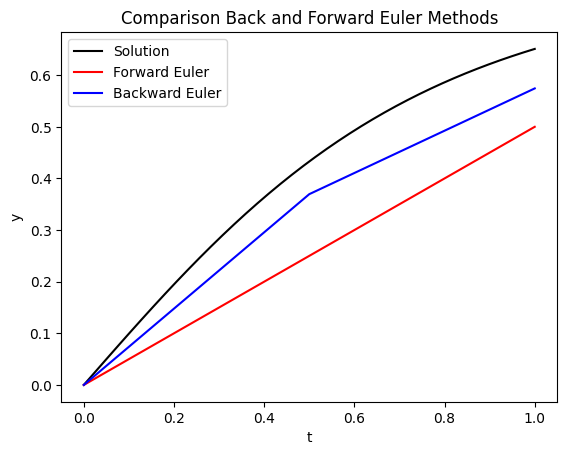

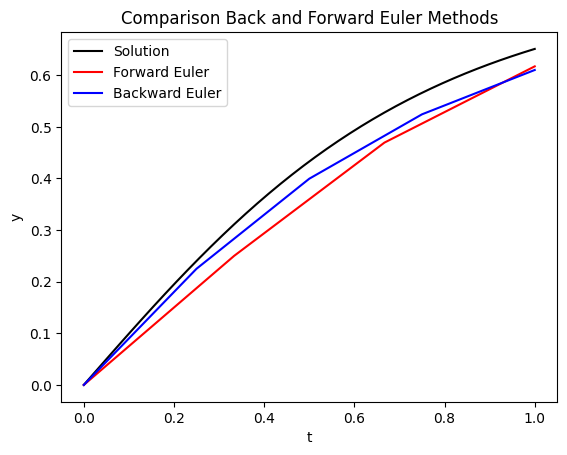

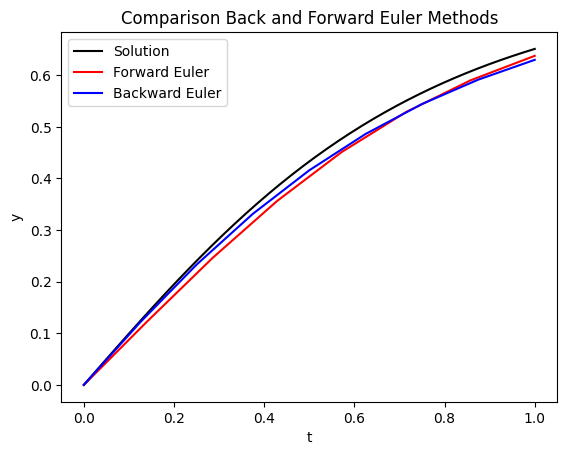

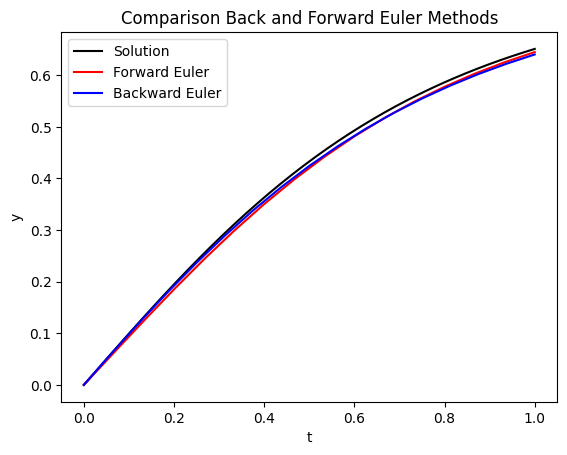

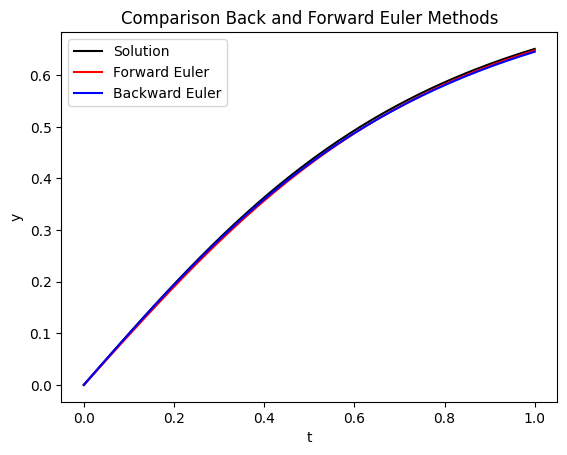

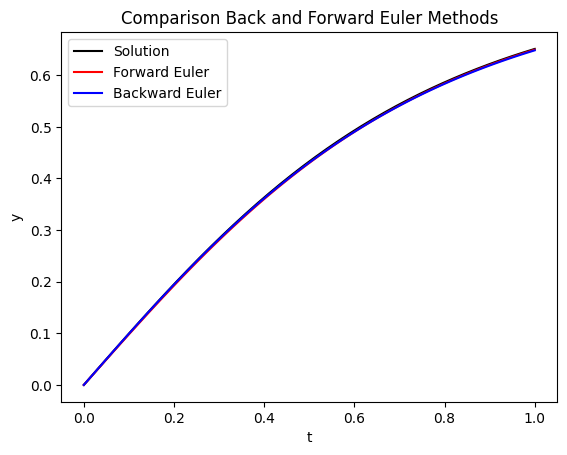

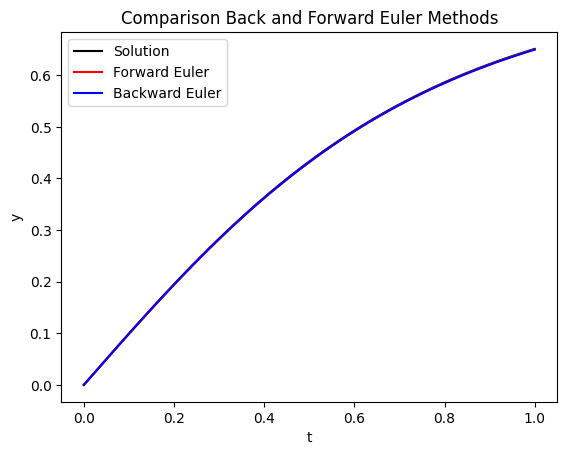

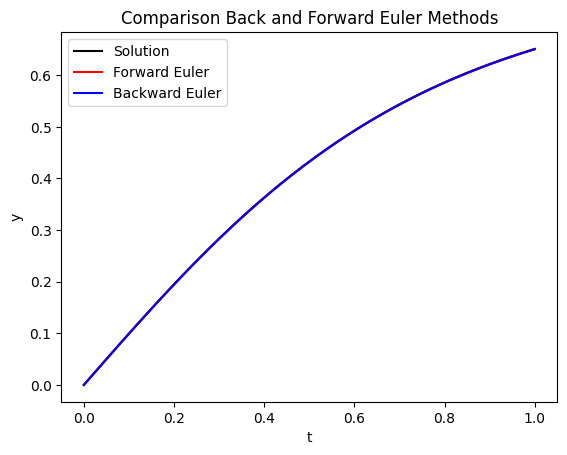

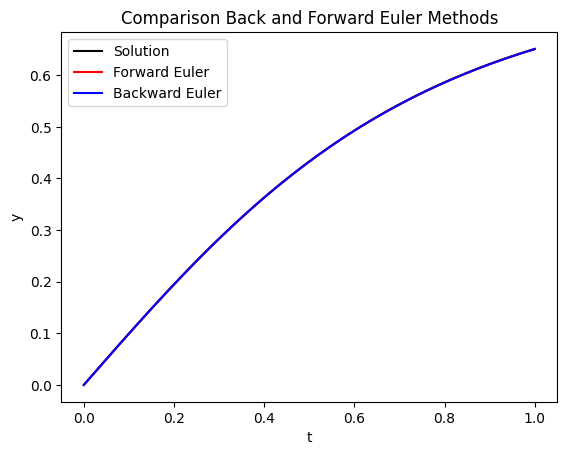

In [8]:
# Define an ODE function
f = lambda t, y: np.cos(2 * y)
sol = lambda t: 0.5 * np.arcsin((np.exp(4 * t) - 1) / (np.exp(4 * t) + 1))

tspan = [0, 1]
y0 = 0
n = 2

ferrors = []
berrors = []
nhs = []
for k in range(1, 10):
    sol_linspace = np.linspace(tspan[0], tspan[1], 40)
    
    plt.plot(sol_linspace, sol(sol_linspace), label="Solution", color="black")

    t, u = feuler(f, tspan, y0, n)
    ferr = max(np.abs(u - sol(t)))
    plt.plot(t, u, label=f"Forward Euler", color="red")
    
    t, u = beuler(f, tspan, y0, n)
    berr = max(np.abs(u - sol(t)))
    
    plt.plot(t, u, label=f"Backward Euler", color="blue")
    plt.title("Comparison Back and Forward Euler Methods")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    ferrors.append(ferr)
    berrors.append(berr)
    
    nhs.append(n)
    n = 2 * n



Forward Errors | Backward Errors | N
------------------------------------
0.150880168023 |  0.076514787693 | 2
0.061074563388 |  0.041663409344 | 4
0.027784530348 |  0.021897980229 | 8
0.012826292953 |  0.011218376855 | 16
0.006169561062 |  0.005676698492 | 32
0.003030031822 |  0.002856432283 | 64
0.001501140968 |  0.001432593655 | 128
0.000747115218 |  0.000717401847 | 256
0.000372697774 |  0.000358978529 | 512


Order of Convergence: Forward Euler
1.3047596376890929
1.1362897908408613
1.115177590199484
1.0558645072709116
1.0258349062630923
1.0132734826474057
1.0066568092136565
1.0033245476237376


Order of Convergence: Backward Euler
0.8769576975179806
0.9279830925904246
0.9649338554168788
0.9827399302465127
0.9908377887832469
0.9955848716973299
0.9977760931205498
0.9988839028448193


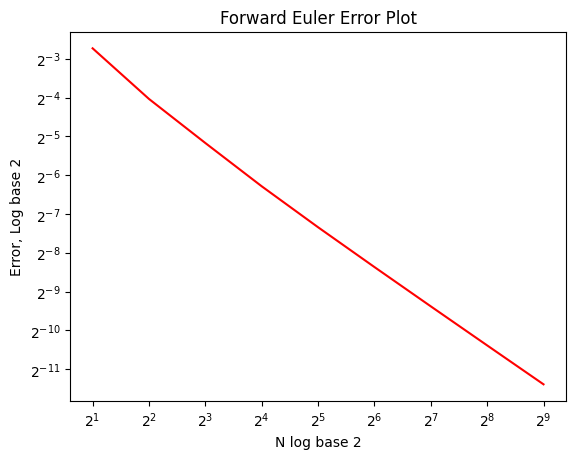

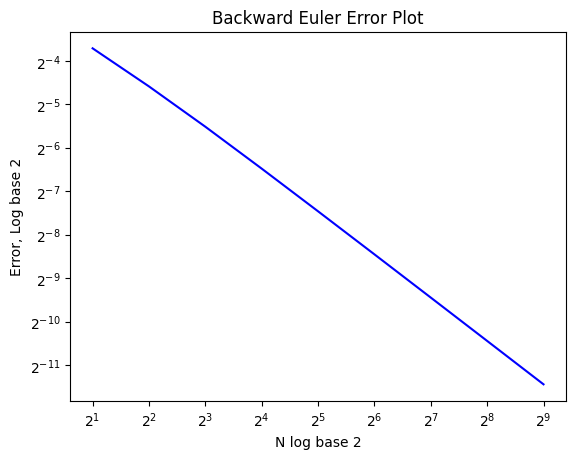

In [9]:
print("Forward Errors | Backward Errors | N")
print("------------------------------------")
for i in range(len(ferrors)):
    print(f"{ferrors[i]:.12f} |  {berrors[i]:.12f} | {nhs[i]}")

print("\n\nOrder of Convergence: Forward Euler")

ferrors = np.array(ferrors)
p = np.log(np.abs(ferrors[:-1] / ferrors[1:])) / np.log(2)
for estimate in p:
    print(estimate)

print("\n\nOrder of Convergence: Backward Euler")
berrors = np.array(berrors)
p = np.log(np.abs(berrors[:-1] / berrors[1:])) / np.log(2)
for estimate in p:
    print(estimate)

plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.plot(nhs, ferrors, label="Forward Euler", color="red")
plt.title("Forward Euler Error Plot")
plt.xlabel("N log base 2")
plt.ylabel("Error, Log base 2")
plt.show()
plt.show()

plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.plot(nhs, berrors, label="Backward Euler", color="blue")
plt.title("Backward Euler Error Plot")
plt.xlabel("N log base 2")
plt.ylabel("Error, Log base 2")
plt.show()